In [1]:
import utils
import pandas as pd
import numpy as np
import datetime
import yfinance as yf

In [2]:
STARTING_DAY = datetime.datetime(1989, 1, 1)
FIRST_ACTION_DAY = datetime.datetime(1994, 1, 1)

In [3]:
weights = pd.read_csv('data/ew_weights.csv', index_col=0)
weights.index = pd.to_datetime(weights.index)

In [4]:
selected_stocks = pd.read_excel('data/selected_stocks.xlsx')

# Download prices
symbols = selected_stocks['Symbol'].tolist()
prices = yf.download(symbols)

# Exclude data before STARTING DAY
prices = prices.loc[STARTING_DAY:]

# Separate variables
adj_close_df = prices['Adj Close']
close_df = prices['Close']
open_df = prices['Open']

adj_close_returns = utils.compute_returns(adj_close_df)
close_returns = utils.compute_returns(close_df)
open_returns = utils.compute_returns(open_df)

[*********************100%%**********************]  11 of 11 completed


In [5]:
start = weights.index[0]

In [6]:
w = weights.loc[start]

In [7]:
ret = adj_close_returns.loc[start:]

In [8]:
period_stocks_returns = ret.loc['1994-01']

In [9]:
period_stocks_returns

Ticker,AAPL,DIS,GE,HD,JPM,LLY,NEE,SHW,WMT,WY,XOM
Date,,,,,,,,,,,
1994-01-03,0.021366,0.011730,-0.008343,-0.018987,0.006230,0.000000,-0.012779,-0.010490,0.020000,-0.014006,0.009900
1994-01-04,0.054394,0.036273,-0.003606,0.012904,0.003096,-0.004210,-0.006473,-0.014135,0.009804,0.042613,0.007844
1994-01-05,0.071428,0.005602,-0.006031,0.019108,-0.009259,-0.008457,-0.013029,-0.028673,-0.009709,0.019074,0.005836
1994-01-06,-0.029628,0.011142,0.008495,-0.046875,-0.015576,-0.008529,-0.019802,-0.007381,-0.034314,0.005347,-0.005803
1994-01-07,0.011449,0.024793,0.004813,0.013115,0.028481,0.002150,0.010101,0.007435,-0.010153,-0.005319,-0.007783
1994-01-10,0.015094,0.026882,0.004791,0.012945,0.015384,0.012876,0.000000,0.000000,0.020513,0.032086,0.013726
1994-01-11,-0.052045,-0.013089,0.007152,-0.012779,-0.006060,-0.006356,0.000000,0.022140,0.025126,-0.010363,-0.001934
1994-01-12,-0.043138,-0.010610,0.003550,0.019418,0.003049,-0.004265,-0.010000,-0.021660,0.000000,-0.007853,0.005814
1994-01-13,0.004102,-0.013405,-0.007075,-0.038095,0.009118,-0.002141,-0.016835,0.003690,0.000000,0.013193,0.011561


In [13]:
x = utils.compute_single_period_returns(period_stocks_returns, w)

<Axes: xlabel='Date'>

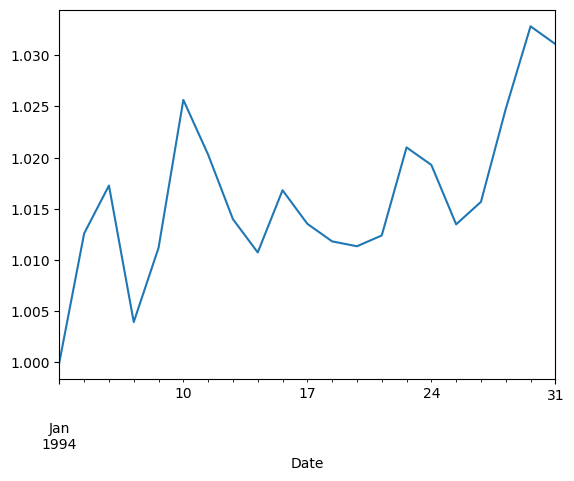

In [15]:
x.sum(axis=1).plot()